In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils_2 import plot_policy, plot_action_values, test_agent

In [2]:
env = Maze()

In [3]:
action_values = np.zeros(shape=(5, 5, 4))

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

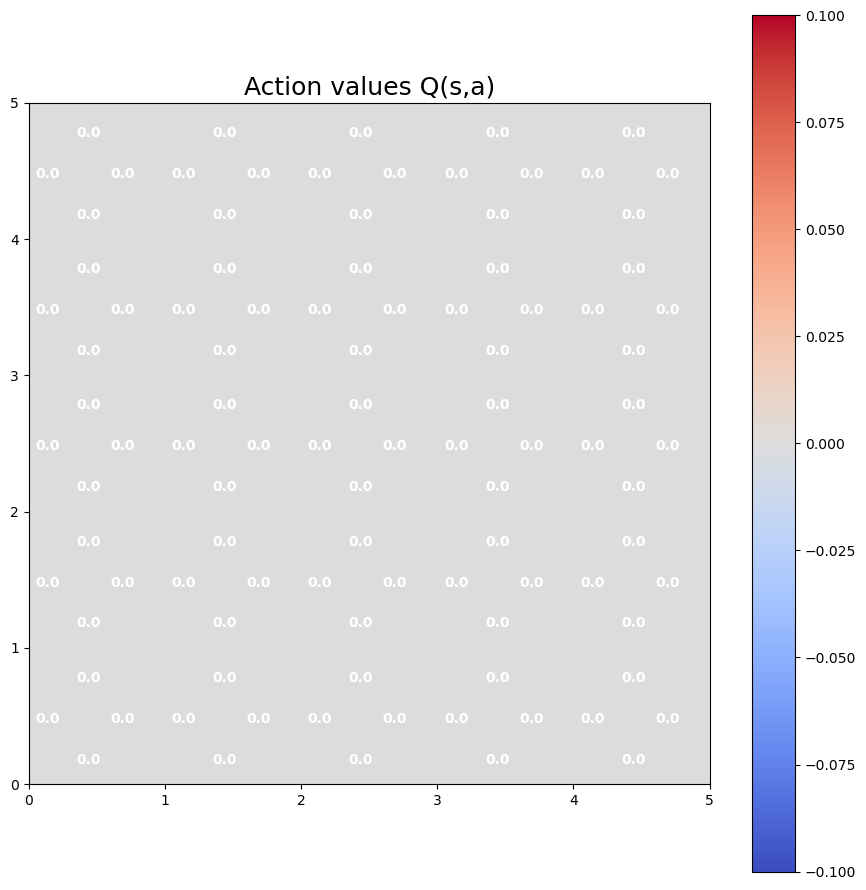

In [5]:
plot_action_values(action_values)

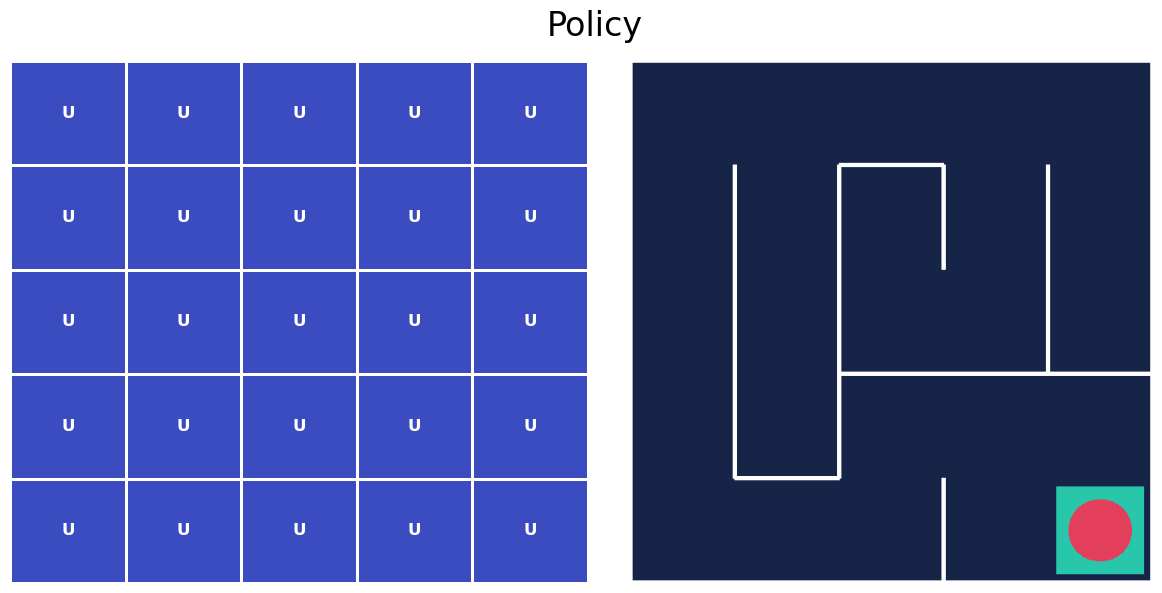

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [7]:
#alpha-: the learning rate
#gamma-: discount factor
#epsilion-: frequency by which policy picks random action
#n-: number of steps before we update action_values estimate for q value
#pick action from policy
#transition to store the state transitions to update q values
#t is the counter that will tell the moment of time
#loop for repeating t-n times
#if not done execute in the enviornment and will update the transitions
#for first n values it will wait for the first updation then for the next t value
#it will take the t-n interactions from the saved transitions and
#update the q value by calculating return G.
#after calculating the return it will calcuate the q value and update it in action_value table
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2, n=8):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0

        while t-n < len(transitions):
            
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])                
        
            if t >= n:
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
            
            t += 1
            state = next_state
            action = next_action 

In [8]:
n_step_sarsa(action_values, policy, 2000)

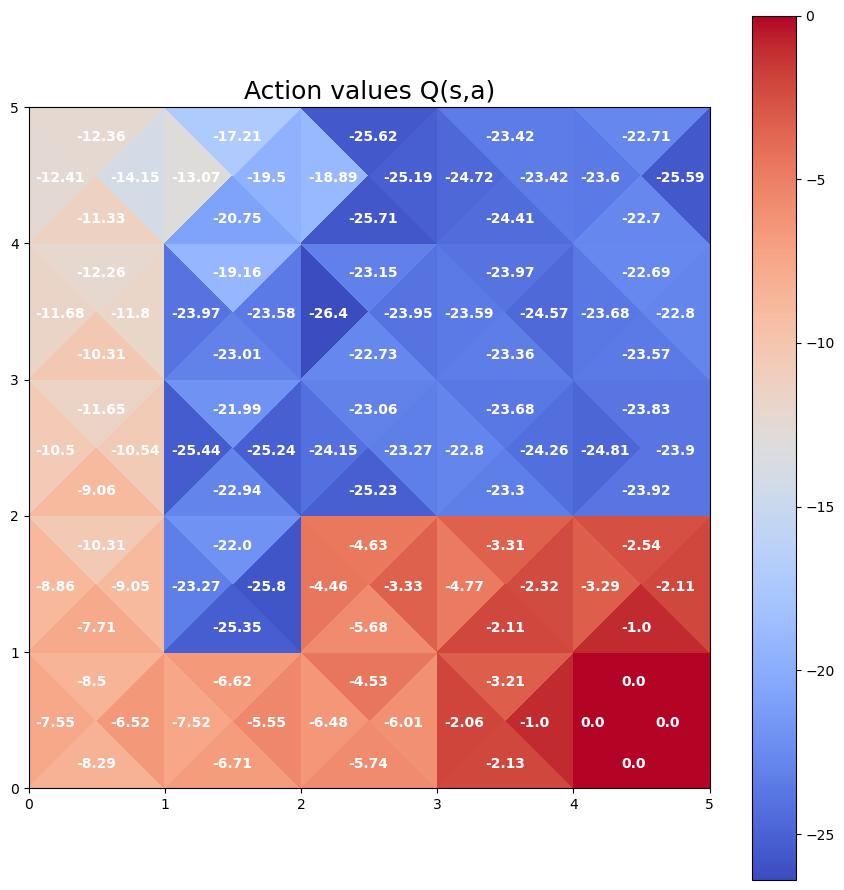

In [9]:
plot_action_values(action_values)

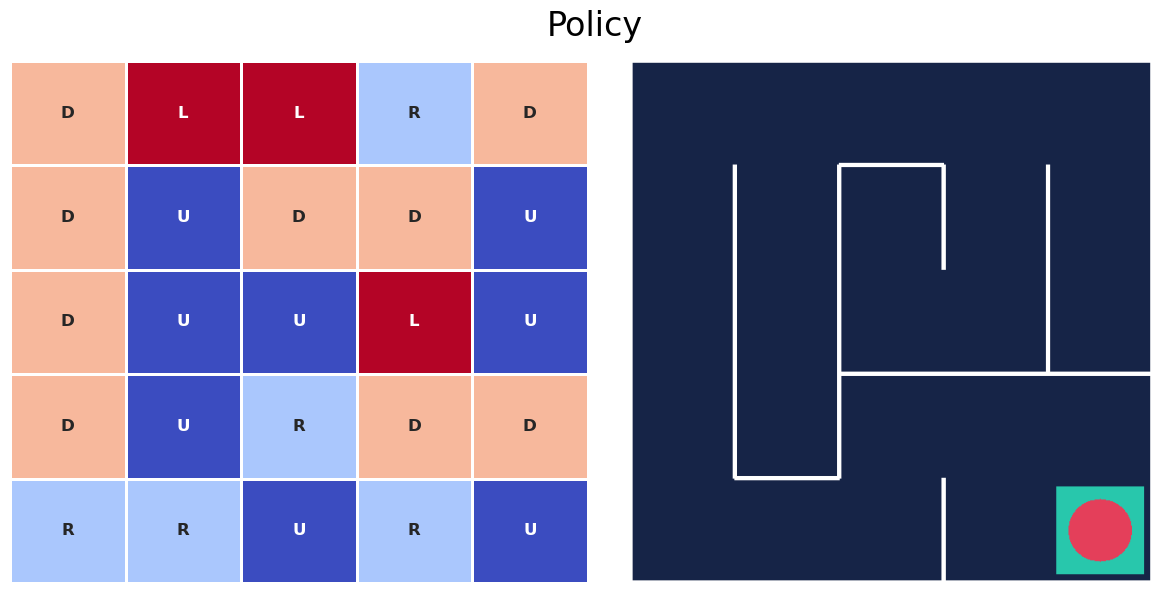

In [10]:
plot_policy(action_values, env.render(mode='rgb_array'))

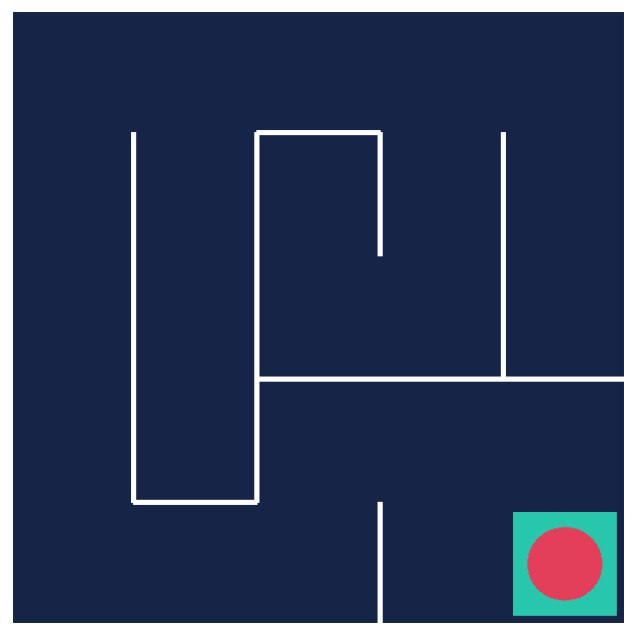

In [11]:
test_agent(env, policy)